In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#학습용 iris 데이터셋 불러오기
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [21]:
iris_data=load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
#데이터와 taget을 이어붙이고 각 taget의 컬럼에다가 feature_name붙이기
#array(행렬) 형태
iris_data["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
#데이터 프레임으로 바꾸기
pd.DataFrame(iris_data["data"]).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
#feature_names 확인
iris_data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
#각 컬럼에다가 feature_name붙이기
df=pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
y=pd.DataFrame(iris_data["target"], columns=["target"])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [27]:
X=df
#행의 개수가 같은지 판단
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [40]:
iris_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
y["target"]=y["target"].apply(lambda x:x.replace())

In [37]:
#a=i의 인덱스 번호 받음
#i=값 받음
for a, i in enumerate(iris_data["target_names"]):
    y["target"]=y["target"].replace(a, i)

,target
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [35]:
#y가 타겟 0,1,2로 구성되어있는데 이 값을 taget_names로 교체하기
#y["target"]=y["target"].replace(0, "setosa")
"""
for a, i in enumerate(iris_data["target_names"]):
    y["target"]=y["target"].replace(a, i)
"""
"""
y = y.replace({'target' : {0:'setosa', 1:'versicolor', 2:'virginica'}})
# target = []
# for i in y['target']:
#     if(i == 0):
#         target.append('setosa')
#     elif(i == 1):
#         target.append('versicolor')
#     elif(i == 2):
#         target.append('virginica')
#     else:
#         pass
# y["target"] = target
y
"""
"""
람다 없는 한 줄 코딩
y = pd.DataFrame([iris_data["target_names"][i] for i in iris_data["target"]], columns = ["target_names"])
"""
y.loc[y.target==0]='setosa'
y.loc[y.target==1]='versicolor'
y.loc[y.target==2]='virginica'
y

,target
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


- lambda apply()

In [57]:
df= pd.DataFrame(iris_data["data"], columns=["sl","sw","pl","pw"])
df

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
#데이터프레임의 인덱싱은 칼럼명을 쓰고 적용해야함
pd.DataFrame(df["sl"])["sl"][0]

5.1

In [49]:
"""
#연산량이 너무 큼
imsi=[]
for i in df["sl"]:
    imsi.append(int(i))
df["sl"]=imsi
df
"""
df["sl"]=df["sl"].apply(lambda x :int(x))
df

,sl,sw,pl,pw
0,5,3.5,1.4,0.2
1,4,3.0,1.4,0.2
2,4,3.2,1.3,0.2
3,4,3.1,1.5,0.2
4,5,3.6,1.4,0.2
...,...,...,...,...
145,6,3.0,5.2,2.3
146,6,2.5,5.0,1.9
147,6,3.0,5.2,2.0
148,6,3.4,5.4,2.3


##### 문제: df["sw"] 값들을 현재 값의 제곱으로 대체(df의 sw컬럼의 값들을 현재 값의 제곱으로 대체해주세요)

In [56]:
df["sw"]=df["sw"].apply(lambda x :x**2)
df

,sl,sw,pl,pw
0,5.1,12.25,1.4,0.2
1,4.9,9.00,1.4,0.2
2,4.7,10.24,1.3,0.2
3,4.6,9.61,1.5,0.2
4,5.0,12.96,1.4,0.2
...,...,...,...,...
145,6.7,9.00,5.2,2.3
146,6.3,6.25,5.0,1.9
147,6.5,9.00,5.2,2.0
148,6.2,11.56,5.4,2.3


##### 다시(점심시간 이후)

In [63]:
#종속변수?독립변수? X
X= pd.DataFrame(iris_data["data"], columns=["sl","sw","pl","pw"])
X

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [66]:
y=pd.DataFrame(iris_data["target"], columns=["target"])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [65]:
for a, i in enumerate(iris_data["target_names"]):
    y["target"]=y["target"].replace(a, i)
y

,target
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [68]:
df=pd.concat([X, y], axis=1)
df

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [70]:
df.corrwith(df["target"])

sl        0.782561
sw       -0.426658
pl        0.949035
pw        0.956547
target    1.000000
dtype: float64

In [72]:
setosa=[]
versicolor=[]
virginica=[]
for i in df["target"]:
    if i == 0:
        setosa.append(1)
        versicolor.append(0)
        virginica.append(0)
    elif i ==1:
        setosa.append(0)
        versicolor.append(1)
        virginica.append(0)
    else:
        setosa.append(0)
        versicolor.append(0)
        virginica.append(1)
df["is setosa"]=setosa
df["is versicolor"]=versicolor
df["is virginica"]=virginica
df

,sl,sw,pl,pw,target,is setosa,is versicolor,is virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,1
146,6.3,2.5,5.0,1.9,2,0,0,1
147,6.5,3.0,5.2,2.0,2,0,0,1
148,6.2,3.4,5.4,2.3,2,0,0,1


In [73]:
"""
setosa는 다른 품종에 비해 sw만 넓고 다른것은 다 작다라는 결과를 얻을 수 있다
"""
df.corrwith(df["is setosa"])

sl              -0.717416
sw               0.603348
pl              -0.922765
pw              -0.887344
target          -0.866025
is setosa        1.000000
is versicolor   -0.500000
is virginica    -0.500000
dtype: float64

In [74]:
#e-02 => 10^-2
#e+02 => 10^2
df.corrwith(df["is versicolor"])

sl               7.939552e-02
sw              -4.677031e-01
pl               2.017545e-01
pw               1.178988e-01
target           5.768888e-18
is setosa       -5.000000e-01
is versicolor    1.000000e+00
is virginica    -5.000000e-01
dtype: float64

In [75]:
df.corrwith(df["is virginica"])

sl               0.638020
sw              -0.135645
pl               0.721011
pw               0.769445
target           0.866025
is setosa       -0.500000
is versicolor   -0.500000
is virginica     1.000000
dtype: float64

In [76]:
from sklearn.model_selection import train_test_split

- sklearn.py선언?
- class model selection
- def train_Test_split
- (model_selection.)train_test_split()
- 선언방법1
- from sklearn import model_selection
- model.selection.train_test_split()
- 선언방법2
- from sklearn.model_selection import train_test_split
- train_test_split()

In [77]:
#순서중요!                                                             
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112, 1)
(38, 1)


In [79]:
X_train

,sl,sw,pl,pw
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


##### EDA: 탐색적 분석

array([[<AxesSubplot:xlabel='sl', ylabel='sl'>,
        <AxesSubplot:xlabel='sw', ylabel='sl'>,
        <AxesSubplot:xlabel='pl', ylabel='sl'>,
        <AxesSubplot:xlabel='pw', ylabel='sl'>],
       [<AxesSubplot:xlabel='sl', ylabel='sw'>,
        <AxesSubplot:xlabel='sw', ylabel='sw'>,
        <AxesSubplot:xlabel='pl', ylabel='sw'>,
        <AxesSubplot:xlabel='pw', ylabel='sw'>],
       [<AxesSubplot:xlabel='sl', ylabel='pl'>,
        <AxesSubplot:xlabel='sw', ylabel='pl'>,
        <AxesSubplot:xlabel='pl', ylabel='pl'>,
        <AxesSubplot:xlabel='pw', ylabel='pl'>],
       [<AxesSubplot:xlabel='sl', ylabel='pw'>,
        <AxesSubplot:xlabel='sw', ylabel='pw'>,
        <AxesSubplot:xlabel='pl', ylabel='pw'>,
        <AxesSubplot:xlabel='pw', ylabel='pw'>]], dtype=object)

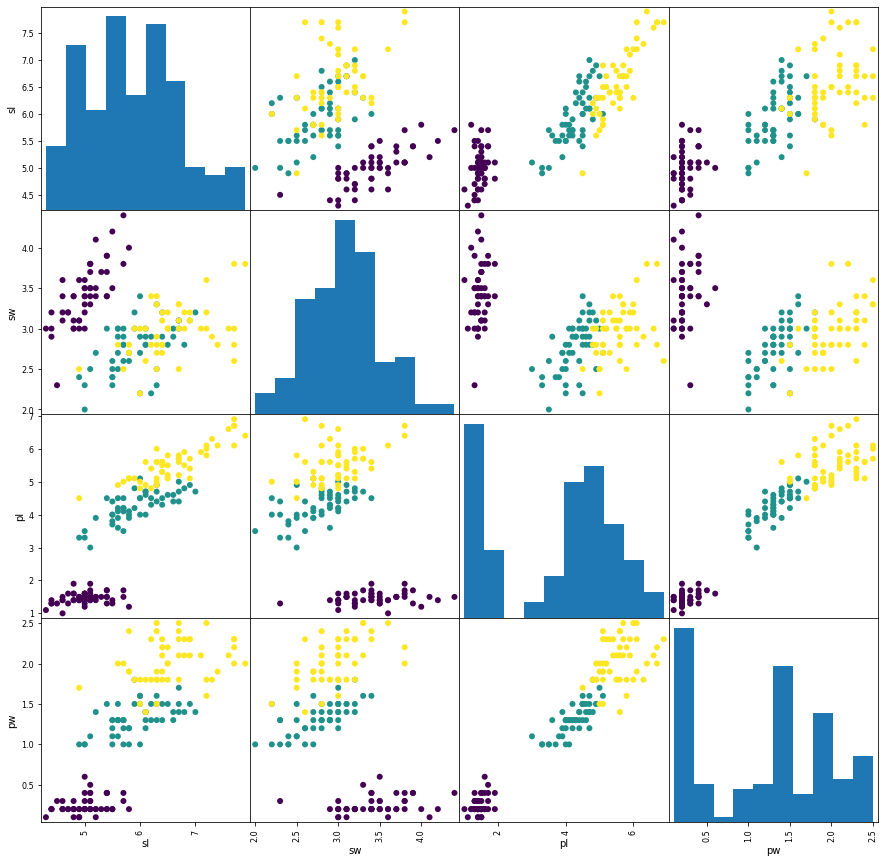

In [81]:
pd.plotting.scatter_matrix(X, figsize=(15, 15), marker="o", c=np.array(y), alpha=1)

In [86]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
prediction=model.predict(X_test)
prediction

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [87]:
metrics.accuracy_score(prediction, y_test)

0.9736842105263158

  0%|          | 0/99 [00:00<?, ?it/s]c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

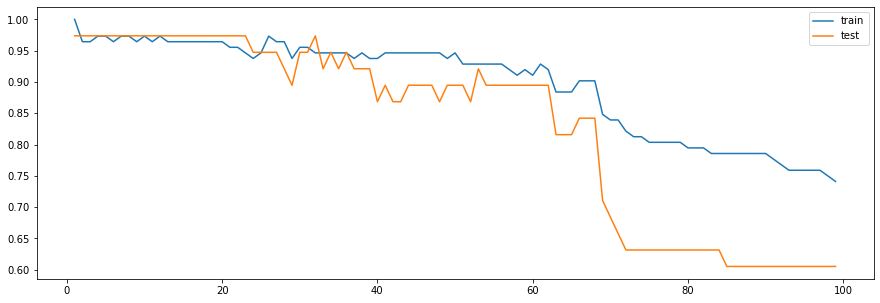

In [92]:
from tqdm import tqdm

train_list=[]
test_list=[]

for i in tqdm(range(1, 100)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    train_list.append(model.score(X_train, y_train))
    test_list.append(model.score(X_test, y_test))

plt.figure(figsize=(15, 5))
plt.plot(range(1, 100), train_list, label="train")
plt.plot(range(1, 100), test_list, label="test")
plt.legend(loc="upper right")
plt.show()